In [ ]:
# the point of this is to see if you can get the same results with different length photonlists
# so I'm going to try different length photonlists for the same eclipse and look at the result 

In [1]:
import numpy as np

from quickbin import bin2d

RNG = np.random.default_rng()

nbins = 5
arrsize = 2000000
op = 'mean'  # count, sum, mean, median, min, max

xarr = RNG.integers(0, 100, arrsize)
yarr = RNG.integers(0, 100, arrsize)
varr = RNG.pareto(0.8, arrsize)

binned = bin2d(xarr, yarr, varr, op, nbins)

In [15]:
start_time = time.time()

image = bin2d(nf['col'], nf['row'],  nf['ra'], 'std', 800)

end_time = time.time()

duration = end_time - start_time
print(f"it took {duration:.4f} seconds")

it took 1.4443 seconds


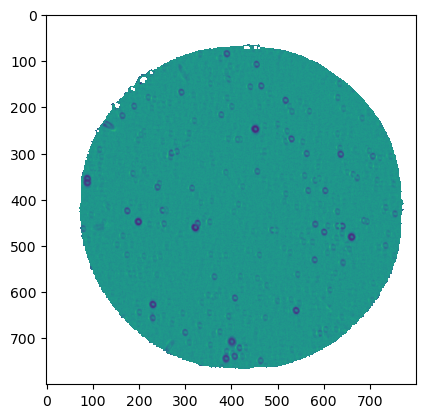

In [9]:
plt.imshow(image)

In [14]:
start_time = time.time()


ra = stats.binned_statistic_2d(nf['col'], nf['row'],  [nf['ra']], 'std', bins=800)
std_ra = ra.statistic[0]

end_time = time.time()

duration = end_time - start_time
print(f"it took {duration:.4f} seconds")


it took 5.5006 seconds


In [4]:
from astropy.io import fits
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pyarrow.parquet as parquet
import fast_histogram as fh
import time
from scipy import stats

In [5]:
nf = parquet.read_table("/home/bekah/gPhoton2/test_data/e23456/e23456-nd-b00.parquet",
                       columns=['col', 'row', 'ra', 'dec', 'response']).to_pandas()

In [6]:
print("filtering & formatting data")

# this is an antiquated cutoff from when radius was 600 for 2dhist
nf = nf[(nf['row']*4 >= -200) & (nf['row']*4 <= 3400) & (nf['col']*4 >= -200) & (nf['col']*4 <= 3400)]

nf['row_rnd'] = nf['row'].round().astype(int)
nf['col_rnd'] = nf['col'].round().astype(int)

nf = nf[(nf['row_rnd'] <= 4799) & (nf['col_rnd'] <= 4799) & (nf['ra']!= 0) & (nf['dec']!= 0)]
nf = nf[(nf['ra'] <= 4799) & (nf['dec'] <= 4799)]

nf = nf[(nf['col_rnd']<800)&(nf['row_rnd']<800)]

nf = nf[(nf['row'] >= -50) 
        & (nf['row'] <= 850) 
        & (nf['col'] >= -50) 
        & (nf['col'] <= 850) 
        & (nf['ra']!= 0) 
        & (nf['dec']!= 0)]
nf = nf.dropna(subset=['ra'])



filtering & formatting data


In [ ]:
# 800 bins / axis 

cut_size = [1, 2, 10, 100, 1000, 10000]

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

start_time = time.time()

for i, cut in enumerate(cut_size): 
    
    ax = axs[i // 3, i % 3]
    
    nf_cut = nf.iloc[::cut]
    
    ra = stats.binned_statistic_2d(nf_cut['col'], nf_cut['row'],  [nf_cut['ra']], 'std', bins=800, range=[[0, 800], [0, 800]])
    dec = stats.binned_statistic_2d(nf_cut['col'], nf_cut['row'],  [nf_cut['dec']], 'std', bins=800, range=[[0, 800], [0, 800]])
    count = stats.binned_statistic_2d(nf_cut['col'], nf_cut['row'],  [nf_cut['dec']], 'count', bins=800, range=[[0, 800], [0, 800]])

    std_dec = dec.statistic[0]
    std_ra = ra.statistic[0]
    ra_count = count.statistic[0]
    combo_std = std_ra + std_dec 

    ax.scatter(combo_std.ravel(), ra_count.ravel(), s=0.5, cmap='grey')
    ax.set_xlabel("dispersion")
    ax.set_ylabel("count")
    ax.set_title(f"every {cut} phots, total phots: {len(nf_cut)}")
    
end_time = time.time()
    
plt.tight_layout()
    
print(f"{end_time - start_time} seconds long")

In [ ]:
# 1600 bins / axis 

cut_size = [1, 2, 10, 100, 1000, 10000]

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

start_time = time.time()

for i, cut in enumerate(cut_size): 
    
    ax = axs[i // 3, i % 3]
    
    nf_cut = nf.iloc[::cut]
    
    ra = stats.binned_statistic_2d(nf_cut['col'], nf_cut['row'],  [nf_cut['ra']], 'std', bins=1600, range=[[0, 800], [0, 800]])
    dec = stats.binned_statistic_2d(nf_cut['col'], nf_cut['row'],  [nf_cut['dec']], 'std', bins=1600, range=[[0, 800], [0, 800]])
    count = stats.binned_statistic_2d(nf_cut['col'], nf_cut['row'],  [nf_cut['dec']], 'count', bins=1600, range=[[0, 800], [0, 800]])

    std_dec = dec.statistic[0]
    std_ra = ra.statistic[0]
    ra_count = count.statistic[0]
    combo_std = std_ra + std_dec 

    ax.scatter(combo_std.ravel(), ra_count.ravel(), s=0.5, cmap='grey')
    ax.set_xlabel("dispersion")
    ax.set_ylabel("count")
    ax.set_title(f"every {cut} phots, total phots: {len(nf_cut)}")
    
end_time = time.time()

plt.tight_layout()
      
print(f"{end_time - start_time} seconds long")
    

In [ ]:
# 3200 bins / axis 

cut_size = [1, 2, 10, 100, 1000, 10000]

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

start_time = time.time()

for i, cut in enumerate(cut_size): 
    
    ax = axs[i // 3, i % 3]
    
    nf_cut = nf.iloc[::cut]
    
    ra = stats.binned_statistic_2d(nf_cut['col'], nf_cut['row'],  [nf_cut['ra']], 'std', bins=3200, range=[[0, 800], [0, 800]])
    dec = stats.binned_statistic_2d(nf_cut['col'], nf_cut['row'],  [nf_cut['dec']], 'std', bins=3200, range=[[0, 800], [0, 800]])
    count = stats.binned_statistic_2d(nf_cut['col'], nf_cut['row'],  [nf_cut['dec']], 'count', bins=3200, range=[[0, 800], [0, 800]])

    std_dec = dec.statistic[0]
    std_ra = ra.statistic[0]
    ra_count = count.statistic[0]
    combo_std = std_ra + std_dec 

    ax.scatter(combo_std.ravel(), ra_count.ravel(), s=0.5, cmap='grey')
    ax.set_xlabel("dispersion")
    ax.set_ylabel("count")
    ax.set_title(f"every {cut} phots, total phots: {len(nf_cut)}")
    
end_time = time.time()

plt.tight_layout()
      
print(f"{end_time - start_time} seconds long")

In [ ]:
# 4000 bins / axis 

cut_size = [1, 2, 10, 100, 1000, 10000]

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

start_time = time.time()

for i, cut in enumerate(cut_size): 
    
    ax = axs[i // 3, i % 3]
    
    nf_cut = nf.iloc[::cut]
    
    ra = stats.binned_statistic_2d(nf_cut['col'], nf_cut['row'],  [nf_cut['ra']], 'std', bins=4000, range=[[0, 800], [0, 800]])
    dec = stats.binned_statistic_2d(nf_cut['col'], nf_cut['row'],  [nf_cut['dec']], 'std', bins=4000, range=[[0, 800], [0, 800]])
    count = stats.binned_statistic_2d(nf_cut['col'], nf_cut['row'],  [nf_cut['dec']], 'count', bins=4000, range=[[0, 800], [0, 800]])

    std_dec = dec.statistic[0]
    std_ra = ra.statistic[0]
    ra_count = count.statistic[0]
    combo_std = std_ra + std_dec 

    ax.scatter(combo_std.ravel(), ra_count.ravel(), s=0.08, cmap='grey')
    ax.set_xlabel("dispersion")
    ax.set_ylabel("count")
    ax.set_title(f"every {cut} phots, total phots: {len(nf_cut)}")
    
end_time = time.time()

plt.tight_layout()
      
print(f"{end_time - start_time} seconds long")

/tmp/ipykernel_7066/2459711378.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(combo_std.ravel(), ra_count.ravel(), s=0.08, cmap='grey')


111.48347735404968 seconds long


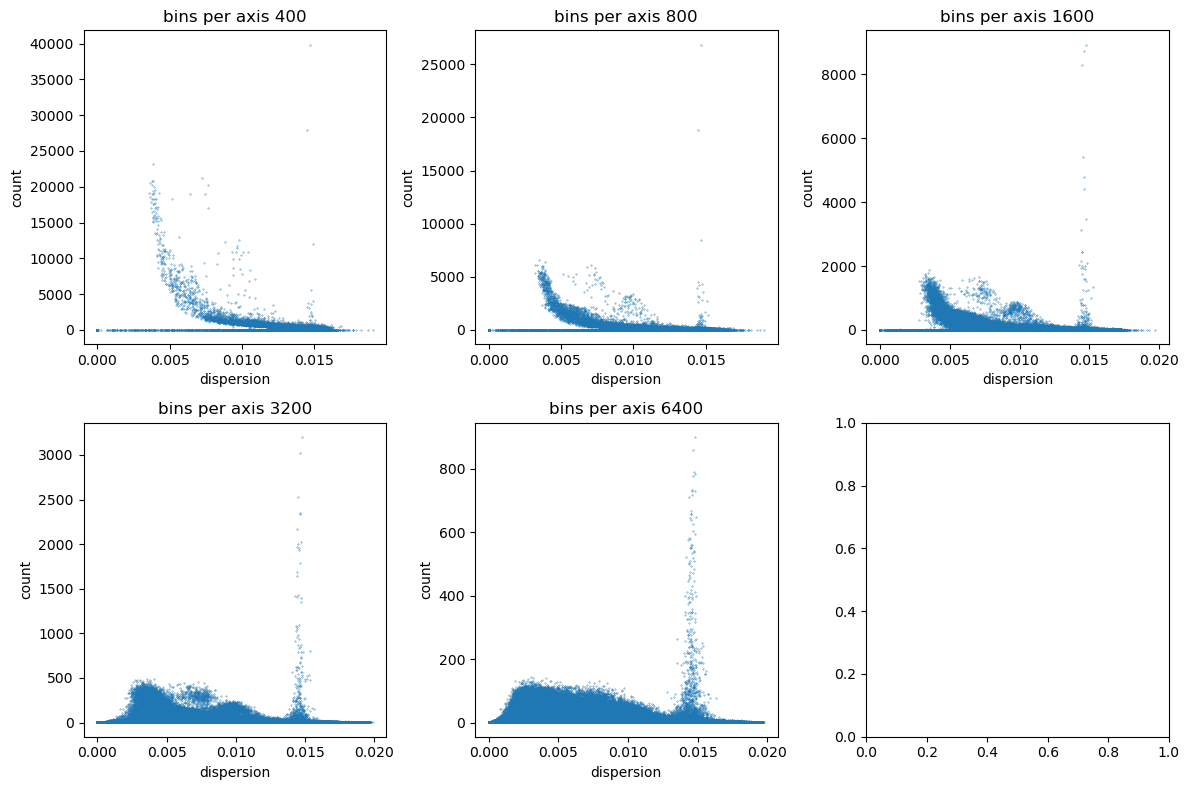

In [4]:
# 4000 bins / axis 

bin_size = [400, 800, 1600, 3200, 6400]

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

start_time = time.time()

for i, cut in enumerate(bin_size): 
    
    ax = axs[i // 3, i % 3]
    
    nf_cut = nf
    
    ra = stats.binned_statistic_2d(nf_cut['col'], nf_cut['row'],  [nf_cut['ra']], 'std', bins=cut, range=[[0, 800], [0, 800]])
    dec = stats.binned_statistic_2d(nf_cut['col'], nf_cut['row'],  [nf_cut['dec']], 'std', bins=cut, range=[[0, 800], [0, 800]])
    count = stats.binned_statistic_2d(nf_cut['col'], nf_cut['row'],  [nf_cut['dec']], 'count', bins=cut, range=[[0, 800], [0, 800]])

    std_dec = dec.statistic[0]
    std_ra = ra.statistic[0]
    ra_count = count.statistic[0]
    combo_std = std_ra + std_dec 

    ax.scatter(combo_std.ravel(), ra_count.ravel(), s=0.08, cmap='grey')
    ax.set_xlabel("dispersion")
    ax.set_ylabel("count")
    ax.set_title(f"bins per axis {cut}")
    
end_time = time.time()

plt.tight_layout()
      
print(f"{end_time - start_time} seconds long")

/tmp/ipykernel_7435/2898530872.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(combo_std.ravel(), ra_count.ravel(), s=0.08, cmap='grey')


Text(0.5, 1.0, '3200 bins per axis')

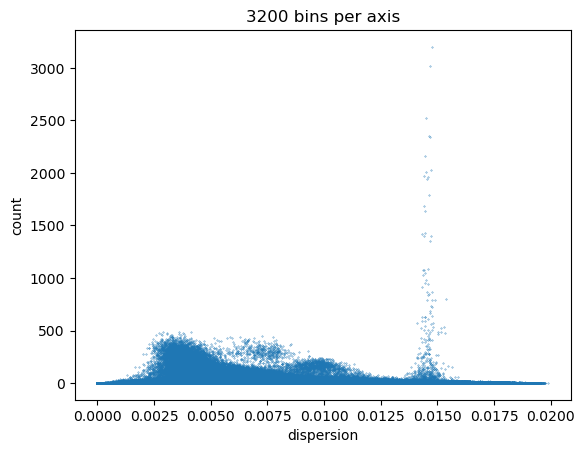

In [5]:
nf_cut = nf

ra = stats.binned_statistic_2d(nf_cut['col'], nf_cut['row'],  [nf_cut['ra']], 'std', bins=3200, range=[[0, 800], [0, 800]])
dec = stats.binned_statistic_2d(nf_cut['col'], nf_cut['row'],  [nf_cut['dec']], 'std', bins=3200, range=[[0, 800], [0, 800]])
count = stats.binned_statistic_2d(nf_cut['col'], nf_cut['row'],  [nf_cut['dec']], 'count', bins=3200, range=[[0, 800], [0, 800]])

std_dec = dec.statistic[0]
std_ra = ra.statistic[0]
ra_count = count.statistic[0]
combo_std = std_ra + std_dec 

hdu1 = fits.PrimaryHDU(combo_std)
hdu2 = fits.ImageHDU(ra_count)

# Create an HDUList and write to a FITS file
hdul = fits.HDUList([hdu1, hdu2])
hdul.writeto('combo_stats.fits', overwrite=True)

plt.scatter(combo_std.ravel(), ra_count.ravel(), s=0.08, cmap='grey')
plt.xlabel("dispersion")
plt.ylabel("count")
plt.title(f"3200 bins per axis")